In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

NUM_EVENTS = 500

#### Barabasi-Albert
- P=1, Gamma=1, 100 Networks and 500 events
- fit function: (t/t_v)^alpha

=> we want alpha=1/2

In [2]:
def BA_func(x, a):
    return  pow(x/np.int64(x[0]), a)

def fit_trajectory(xdata, ydata):
    
    popt, pcov = curve_fit(lambda x, a: BA_func(x, a), xdata, ydata, maxfev=5000, bounds=([0], [np.inf]))
    alpha = popt[0]

    return alpha

In [3]:
df = pd.read_csv("Barabasi-Albert.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,start_event
0,0,1,1,1,1,1,1,1,1,1,...,17,17,17,17,17,17,17,17,17,1
1,0,1,2,3,3,4,4,5,6,6,...,103,103,103,103,103,103,103,103,103,1
2,0,0,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,2
3,0,0,0,1,2,2,3,3,3,3,...,40,40,40,40,40,40,40,40,40,3
4,0,0,0,0,1,1,1,1,1,1,...,11,11,11,11,11,11,11,11,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,495
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,496
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,497
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,498


In [6]:
# retrieve average trajectories by starting year
avg_x = []
avg_y = []
for curr_e in range(2, NUM_EVENTS):
    sub_df = df[df["start_event"]==curr_e]
    
    x, y = [],[]
    for e in range(curr_e, NUM_EVENTS):
        x.append(e)
        y.append(sub_df[str(e)].mean())
    
    avg_x.append(x)
    avg_y.append(y)

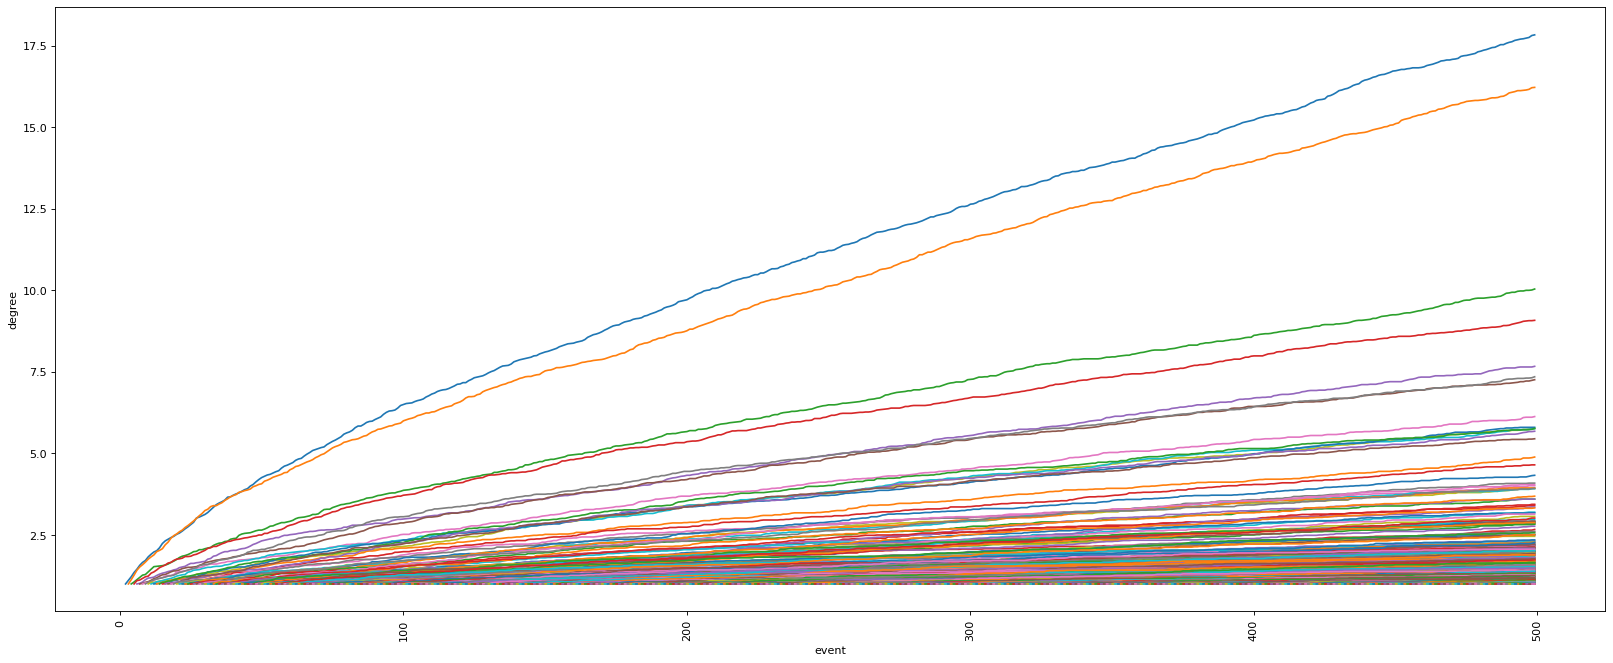

In [7]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.xlabel("event")
plt.ylabel("degree")
plt.xticks(rotation='vertical')

for curr_e in range(len(avg_x)):
    x = avg_x[curr_e]
    y = avg_y[curr_e]
    
    plt.plot(x,y)

plt.show()
    

In [8]:
expected_alpha = 1/2

In [9]:
alphas = []
diffs = []

#print("-- event -- \t-- alpha -- \t -- alpha-1/2 --")
for curr_e in range(len(avg_x)):
    x = avg_x[curr_e]
    y = avg_y[curr_e]
    
    alpha = fit_trajectory(x, y)
    alpha = "%.2f" % alpha
    alphas.append(float(alpha))

    diff = "%.2f" % pow(float(alpha)-expected_alpha, 2)
    diffs.append(float(diff))
    #print(curr_e, "\t\t", alpha, "\t\t", diff )



results = pd.DataFrame({"event": range(2, NUM_EVENTS), "alpha": alphas, "diff": diffs})
    
results


,event,alpha,diff
0,2,0.51,0.00
1,3,0.53,0.00
2,4,0.46,0.00
3,5,0.47,0.00
4,6,0.44,0.00
...,...,...,...
493,495,0.01,0.24
494,496,3.87,11.36
495,497,0.02,0.23
496,498,0.03,0.22


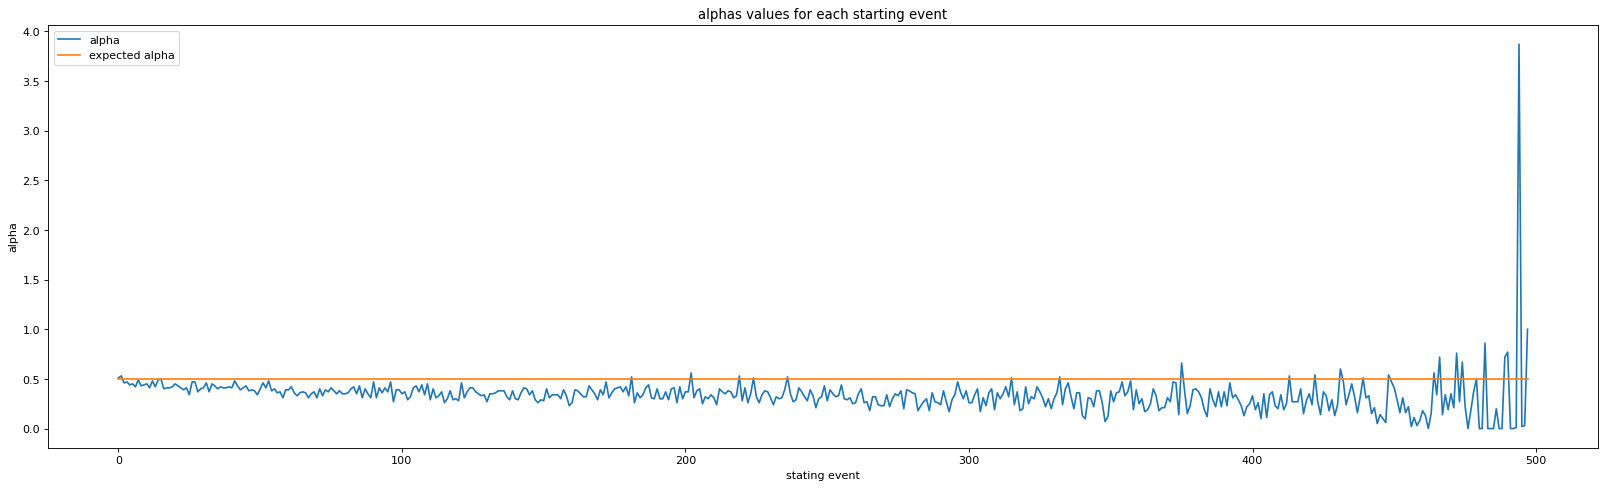

In [12]:
# plot alpha
plt.figure(figsize=(25, 7), dpi=80)
plt.title("alphas values for each starting event")
plt.xlabel("stating event")
plt.ylabel("alpha")
plt.plot([i for i in range(len(results))], results["alpha"], label="alpha")
plt.plot([i for i in range(len(results))], [expected_alpha for i in range(len(results))], label="expected alpha")
plt.legend()
plt.show()

In [23]:
print("-- alpha must be", expected_alpha, "--")
# how many alpha differ from the  expectation of the given tolerance
print("-- #alphas such that alphas)-1/2 <= tolerance -- ")
tolerance = 0.0
while tolerance <= 1:
    print("tolerance =", "%.1f"%tolerance, "-> #aphas =", len(results[pow(results["diff"], 1/2) <= tolerance]))
    tolerance += 0.1

-- alpha must be 0.5 --
-- #alphas such that alphas)-1/2 <= tolerance -- 
tolerance = 0.0 -> #aphas = 60
tolerance = 0.1 -> #aphas = 163
tolerance = 0.2 -> #aphas = 353
tolerance = 0.3 -> #aphas = 435
tolerance = 0.4 -> #aphas = 476
tolerance = 0.5 -> #aphas = 497
tolerance = 0.6 -> #aphas = 497
tolerance = 0.7 -> #aphas = 497
tolerance = 0.8 -> #aphas = 497
tolerance = 0.9 -> #aphas = 497
tolerance = 1.0 -> #aphas = 497


In [21]:
results.sort_values(by="diff",  ascending=True)

,event,alpha,diff
0,2,0.51,0.00
357,359,0.48,0.00
41,43,0.48,0.00
42,44,0.43,0.00
45,47,0.43,0.00
...,...,...,...
480,482,0.00,0.25
476,478,0.00,0.25
488,490,0.00,0.25
497,499,1.00,0.25
